In [8]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import os

from mpl_toolkits.mplot3d import Axes3D

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import json
from sklearn.feature_extraction.text import TfidfVectorizer

df = pd.read_json("rtvslo_keywords.json")
df['keywords_str'] = df['gpt_keywords'].apply(lambda x: ' '.join(x))

vectorizer = TfidfVectorizer(min_df=20)
tfidf_matrix = vectorizer.fit_transform(df['keywords_str'])

tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=vectorizer.get_feature_names_out())

# import ace_tools as tools; tools.display_dataframe_to_user("TF-IDF Matrix", tfidf_df)


['000' '10' '100' ... 'župan' 'župani' 'županja']


[0.00885818 0.00498872 0.00416335]
['pca0' 'pca1' 'pca2']


KeyboardInterrupt: 

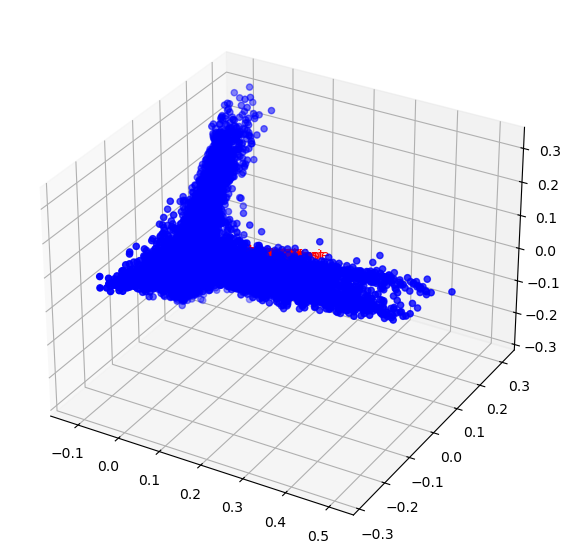

In [11]:
pca = PCA(n_components=3)

pca_result = pca.fit_transform(tfidf_matrix.toarray())
print(pca.explained_variance_ratio_)
print(pca.get_feature_names_out())
pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2', 'PC3'])

# Add article titles to the PCA DataFrame for reference
pca_df['title'] = df['title']

# Create a biplot
def biplot(data, loadings, labels):
    fig = plt.figure(figsize=(10, 7))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(data[:, 0], data[:, 1], data[:, 2], c='b', marker='o')
    for i, (label, vec) in enumerate(zip(labels, loadings)):
        ax.quiver(0, 0, 0, vec[0], vec[1], vec[2], color='r')
        ax.text(vec[0], vec[1], vec[2], label, color='r')
    ax.set_xlabel('PC1')
    ax.set_ylabel('PC2')
    ax.set_zlabel('PC3')
    plt.title('PCA Biplot')
    plt.show()

# Get the loadings
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

# Plot the biplot
biplot(pca_result, loadings, vectorizer.get_feature_names_out())

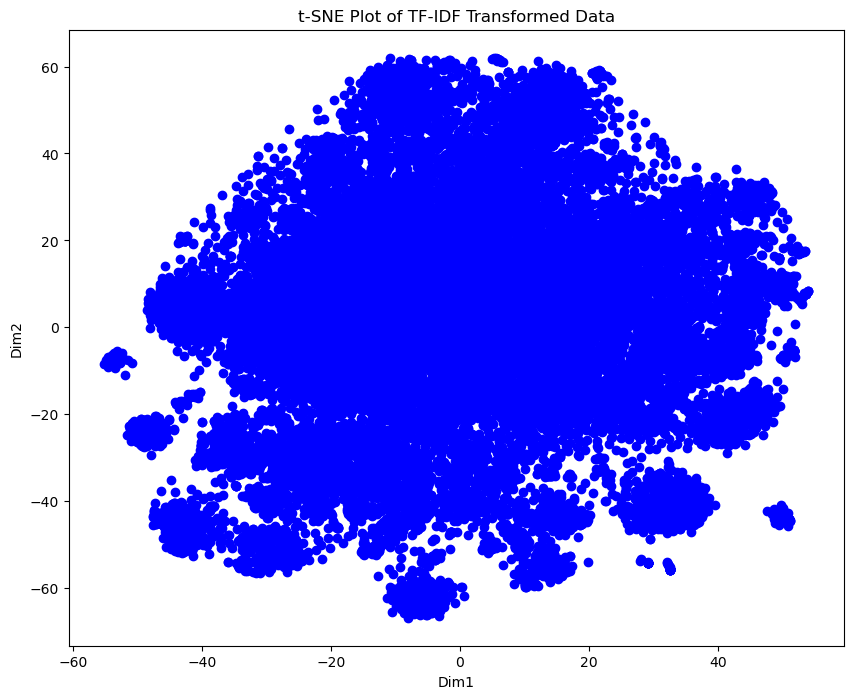

In [6]:
from sklearn.manifold import TSNE

# Perform t-SNE
tsne = TSNE(n_components=2, random_state=42)
tsne_transformed = tsne.fit_transform(tfidf_df)

# Create a DataFrame for the t-SNE-transformed data
tsne_df = pd.DataFrame(tsne_transformed, columns=['Dim1', 'Dim2'])

# Plot the t-SNE-transformed data
plt.figure(figsize=(10, 8))
plt.scatter(tsne_df['Dim1'], tsne_df['Dim2'], c='blue', marker='o')
plt.title('t-SNE Plot of TF-IDF Transformed Data')
plt.xlabel('Dim1')
plt.ylabel('Dim2')
plt.show()